### We're working with a file with more than 1 700 000 lines, let's obtain just the data we want, we keep a flight if: 
- The segment number is 1, so it's the first segment of a flight. 
- The first point of the segment is the airport of departure, as a check.
- The departure and arrival airports are different, so we don't have self-links

In [1]:
file = open("/home/pher/Documents/chiavetta_micc/zip/20170901_m1.so6") # we open the file to read every line and then we close it
data = file.readlines()
file.close()

In [2]:
datalist = [0]*len(data) # we create an empty list.

In [3]:
for i in range(len(data)): # we clean the data a little, and assign it to a new list, that now has a sublist of strings.
    data[i] = data[i].replace("_"," ")
    datalist[i]=data[i].split(" ")
    
del data

In [4]:
print(len(datalist)) # this is how many flights data we have in the beginning

1751823


In [5]:
print(datalist[7]) #this is a typical element now

['EDDF', '$AAAA', 'EDDF', 'EGLL', 'A20N', '105100', '105131', '4', '15', '0', 'DLH906', '170901', '170901', '3002.000000', '514.233333', '3000.983333', '514.016667', '210657801', '1', '1.026152', '0\n']


In [6]:
# Let's check how many unique airports are mentioned in our 1 750 000 rows of data
database10 = set()
for i in range(len(datalist)):
    if str(datalist[i][2]) not in database10:
        database10.add(str(datalist[i][2]))
    if str(datalist[i][3]) not in database10:
        database10.add(str(datalist[i][3]))    

In [7]:
print(len(database10)) # we have this many unique airports

1398


In [8]:
output = [] # we now apply our conditions
for i in range (len(datalist)):
    if (datalist[i][18] == "1") and (datalist[i][2] != datalist[i][3]) and (datalist[i][0] == datalist[i][2]):
        output.append(datalist[i])

In [9]:
print(len(output))
print(output[0:3]) #Output is now a list of strings.

36522
[['EDDF', '$AAAA', 'EDDF', 'EGLL', 'A20N', '105100', '105131', '4', '15', '0', 'DLH906', '170901', '170901', '3002.000000', '514.233333', '3000.983333', '514.016667', '210657801', '1', '1.026152', '0\n'], ['KEWR', '$AABN', 'KEWR', 'LFPG', 'B764', '223000', '223029', '0', '110', '0', 'UAL57', '170831', '170831', '2441.800000', '-4450.100000', '2455.883333', '-4437.833333', '210643131', '1', '16.868005', '0\n'], ['EDDM', '$AABw', 'EDDM', 'LRSB', 'CRJ9', '124800', '124829', '15', '25', '0', 'DLH5PP', '170901', '170901', '2901.233333', '707.166667', '2901.233333', '708.750000', '210662992', '1', '1.052169', '0\n']]


In [10]:
output = str(output) # let's cliean it from useless char
output = output.replace("[","")
output = output.replace("]","")
output = output.replace("'","")
output = output.replace(",","")


In [11]:
print(len(output)) # now output is just a very very long string

5116432


In [12]:
output = output.split("\\n ") # Let's split it in a list of string

In [13]:
print(len(output))
print(output[0])

36522
EDDF $AAAA EDDF EGLL A20N 105100 105131 4 15 0 DLH906 170901 170901 3002.000000 514.233333 3000.983333 514.016667 210657801 1 1.026152 0


### From here on we do a bit of Complex Networks work

In [14]:
outputl = [0] * len(output) # let's create a list, from output

for i in range (len(output)):
    outputl[i] = output[i].split(" ")

In [15]:
print(outputl[15232]) # this is what outputl contains
print(outputl[15232][2])

['ULMM', '$DsCD', 'ULMM', 'UMKK', 'B735', '182000', '182207', '3', '10', '0', 'AUL529', '170901', '170901', '4126.900000', '1965.066667', '4126.350000', '1965.100000', '210673953', '1', '0.550132', '0']
ULMM


In [16]:
register = {} # we make a register with information on the flights
indegree = {}
outdegree = {}


for i in range(len(outputl)):
    if str(str(outputl[i][2]) + "_" + str(outputl[i][3])) in register:
        register[str(str(outputl[i][2]) + "_" + str(outputl[i][3]))] += 1
    else:
        register[str(str(outputl[i][2]) + "_" + str(outputl[i][3]))] = 1
        if str(outputl[i][3]) in indegree:
            indegree[str(outputl[i][3])] += 1
        else:
            indegree[str(outputl[i][3])] = 1
        if str(outputl[i][2]) in outdegree:
            outdegree[str(outputl[i][2])] += 1
        else:
            outdegree[str(outputl[i][2])] = 1
    
        

In [17]:
print(register["EDDF_EGLL"]) # we can see how much flight departed from EDDF and arrived at EGLL

18


In [18]:
print(len(register)) # this is the number of connections

16640


In [19]:
# Let's create a database for ICAO codes of flights we have considering

database1 = set()
for i in range(len(outputl)):
    if str(outputl[i][2]) not in database1:
        database1.add(str(outputl[i][2]))
    if str(outputl[i][3]) not in database1:
        database1.add(str(outputl[i][3]))

In [20]:
print("Our database contains {} airports".format(len(database1)))

Our database contains 1388 airports


### We can make a code to check how much flights are there from a departure airport to an arrival one
### Just input from keyboard the ICAO code of the two airports, when asked. Lowercase works too

### Let's write a code to calculate instrenght and outstrenght of the airports

In [21]:
instrenght = {}
outstrenght = {}

for i in range(len(outputl)):
    if str(outputl[i][3]) in instrenght:
        instrenght[str(outputl[i][3])] += 1
    else:
        instrenght[str(outputl[i][3])] = 1
    
    if str(outputl[i][2]) in outstrenght:
        outstrenght[str(outputl[i][2])] += 1
    else:
        outstrenght[str(outputl[i][2])] = 1

### This code is pretty similar to the last one, you input a ICAO code and the program tells you information about the flight degrees

### I added a few lines of code to check the top 10 airports for degree, strenght ecc.

In [22]:
top = sorted(indegree.items(), key=lambda x: -x[1]) #top airports indegree
print(top[0:10])

[('LTBA', 241), ('EHAM', 237), ('LFPG', 232), ('EDDF', 219), ('EDDM', 188), ('LEMD', 171), ('LEBL', 167), ('EGSS', 167), ('EGLL', 161), ('LIRF', 160)]


In [23]:
top = sorted(instrenght.items(), key=lambda x: -x[1]) #top airports instrenght
print(top[0:10])

[('EHAM', 806), ('LFPG', 768), ('EDDF', 744), ('LTBA', 724), ('EGLL', 710), ('EDDM', 624), ('LEMD', 592), ('LEBL', 547), ('LIRF', 522), ('EGKK', 502)]


In [24]:
top = sorted(outdegree.items(), key=lambda x: -x[1]) #top airports outdegree
print(top[0:10])

[('LTBA', 245), ('EHAM', 244), ('LFPG', 237), ('EDDF', 218), ('EDDM', 188), ('LEMD', 178), ('LEBL', 167), ('EGLL', 164), ('LOWW', 158), ('EGSS', 158)]


In [25]:
top = sorted(outstrenght.items(), key=lambda x: -x[1]) #top airports outstrenght
print(top[0:10])

[('EHAM', 813), ('LFPG', 800), ('EGLL', 745), ('EDDF', 736), ('LTBA', 732), ('LEMD', 619), ('EDDM', 618), ('LEBL', 543), ('EGKK', 487), ('LIRF', 486)]


In [26]:
import igraph as ig
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [27]:
nnodes = len(database1)

In [28]:
string1 = str(database1)

In [29]:
string1 = string1.replace("'","")
string1 = string1.replace("{","")
string1 = string1.replace("}","")
string1 = string1.replace(",","")

In [30]:
list1 = string1.split(" ")

In [31]:
list1.sort()

In [32]:
print(list1) # this should be the list of the ICAO codes of our airports, alphabetically ordered

['BGMV', 'BGSF', 'BIKF', 'BIRK', 'BKPR', 'CYBG', 'CYEG', 'CYHZ', 'CYJT', 'CYOW', 'CYPQ', 'CYQX', 'CYTR', 'CYUL', 'CYVR', 'CYYC', 'CYYR', 'CYYT', 'CYYZ', 'DAAE', 'DAAG', 'DAAQ', 'DAAS', 'DAAV', 'DABB', 'DABC', 'DAOF', 'DAON', 'DAOO', 'DAUA', 'DAUG', 'DAUH', 'DAUZ', 'DBBB', 'DFFD', 'DGAA', 'DIAP', 'DNAA', 'DNMM', 'DNPO', 'DRRN', 'DTMB', 'DTNH', 'DTTA', 'DTTJ', 'DXXX', 'EBAW', 'EBBE', 'EBBR', 'EBCI', 'EBCV', 'EBKH', 'EBKT', 'EBLG', 'EBMB', 'EBOS', 'EDAC', 'EDAD', 'EDAH', 'EDAQ', 'EDAV', 'EDAY', 'EDAZ', 'EDBK', 'EDBM', 'EDBN', 'EDCG', 'EDDB', 'EDDC', 'EDDE', 'EDDF', 'EDDG', 'EDDH', 'EDDK', 'EDDL', 'EDDM', 'EDDN', 'EDDP', 'EDDR', 'EDDS', 'EDDT', 'EDDV', 'EDDW', 'EDEN', 'EDFB', 'EDFC', 'EDFE', 'EDFH', 'EDFL', 'EDFM', 'EDFQ', 'EDFR', 'EDFU', 'EDFV', 'EDFZ', 'EDGE', 'EDGS', 'EDHA', 'EDHE', 'EDHI', 'EDHK', 'EDHL', 'EDHX', 'EDJA', 'EDKB', 'EDLA', 'EDLB', 'EDLD', 'EDLE', 'EDLI', 'EDLM', 'EDLN', 'EDLP', 'EDLS', 'EDLT', 'EDLV', 'EDLW', 'EDMA', 'EDMB', 'EDML', 'EDMO', 'EDMS', 'EDMV', 'EDMY', 'EDNY',

In [33]:
index1 = {}  # this is just a index dictionary, used to know when a certain ICAO code is in the ordered list.

for i in range(len(list1)):
    index1[list1[i]] = i

In [34]:
edges = [] # here i populate the edges list with the couples of connections
for i in range(len(outputl)):
    
    if (index1[str(outputl[i][2])],index1[str(outputl[i][3])]) not in edges and (index1[str(outputl[i][2])],index1[str(outputl[i][3])]) not in edges:
        edges.append((index1[str(outputl[i][2])],index1[str(outputl[i][3])]))
    

In [35]:
print(index1[list1[250]])

250


In [36]:
totald = {} # this is a code to calculate the total degree

for i in range(len(list1)):
    if outdegree.get(list1[i], -1) != (-1) and indegree.get(list1[i], -1) != (-1) :
        totald[list1[i]] = indegree[list1[i]] + outdegree[list1[i]]
    elif outdegree.get(list1[i], -1) != (-1):
        totald[list1[i]] = outdegree[list1[i]]
    elif indegree.get(list1[i], -1) != (-1):
        totald[list1[i]] = indegree[list1[i]]
    # print(outdegree[list1[i]])

In [37]:
top = sorted(totald.items(), key=lambda x: -x[1]) # top 10 airports total degree
print(top[0:10])

[('LTBA', 486), ('EHAM', 481), ('LFPG', 469), ('EDDF', 437), ('EDDM', 376), ('LEMD', 349), ('LEBL', 334), ('EGLL', 325), ('EGSS', 325), ('EGKK', 313)]


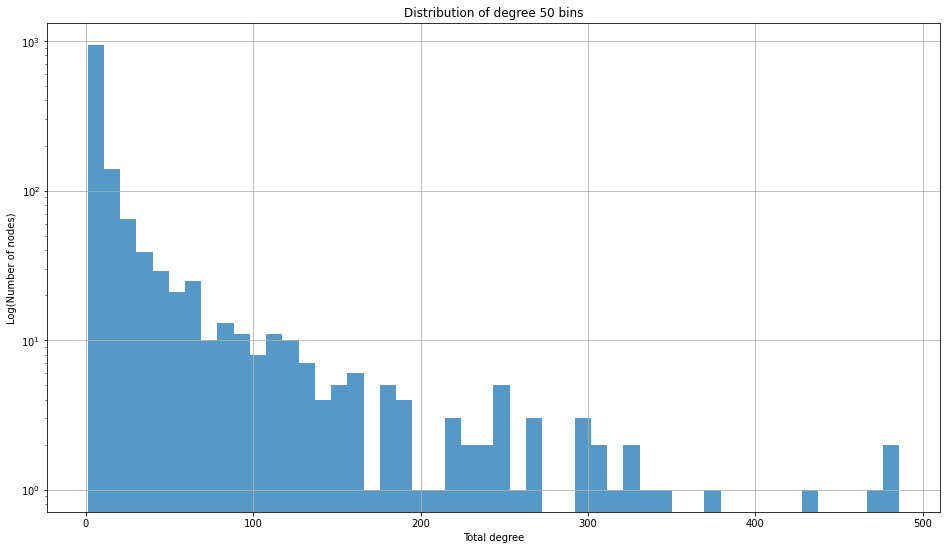

In [38]:
# Here I'll try to make a graph of the degree distribution
# We want the degree on the x, and the number of nodes with that degree on the y
# Or the histogram of the degree, we need x as the vector of the degree

x = list(totald.values())
bins = 50

plt.figure(figsize=(16,9)) #must come BEFORE the actual plot
plt.hist(x, bins, alpha=0.75, density=False) #Alpha is the opacity, density is the normalization
plt.grid(True)
plt.locator_params(nbins=20) # this is about the density of thicks on both axis I could add <, axis='x'> inside the parentesis, to do just for one axis
plt.xlabel('Total degree')
plt.ylabel('Log(Number of nodes)')
plt.title('Distribution of degree ' + str(bins) + " bins")
plt.yscale('log')
plt.xscale('linear')
plt.savefig('degree_distribution_' + str(bins) + "bins" + ".png") #always save before plt.show() it should be "namefile.png" or "namefile.pdf"
plt.show()


In [39]:
x.sort()
x = np.array(x)
y = np.arange(len(x)) / float(len(x))

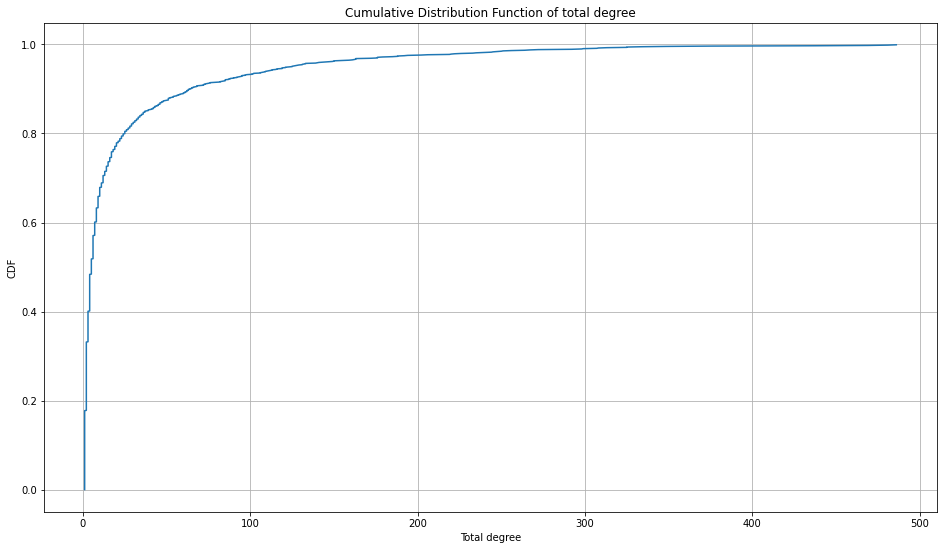

In [40]:
plt.figure(figsize=(16,9))
plt.plot(x, y) 
plt.grid(True)
plt.xlabel('Total degree')
plt.ylabel('CDF')
plt.title("Cumulative Distribution Function of total degree")
plt.yscale('linear')
plt.xscale('linear')
plt.savefig("CDF.png")
plt.show()

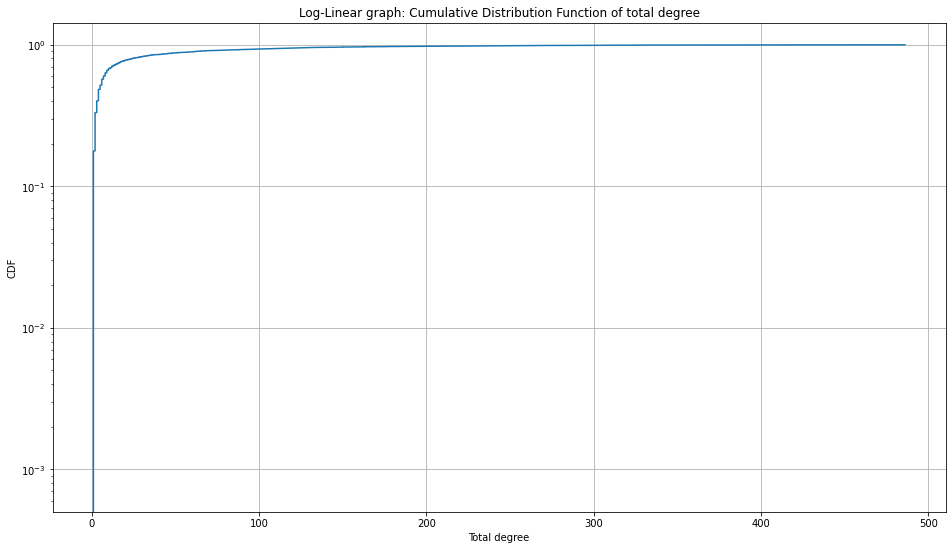

In [41]:
plt.figure(figsize=(16,9))
plt.plot(x, y) 
plt.grid(True)
plt.xlabel('Total degree')
plt.ylabel('CDF')
plt.title("Log-Linear graph: Cumulative Distribution Function of total degree")
plt.yscale('log')
plt.xscale('linear')
plt.savefig("CDF_log_linear.png")
plt.show()

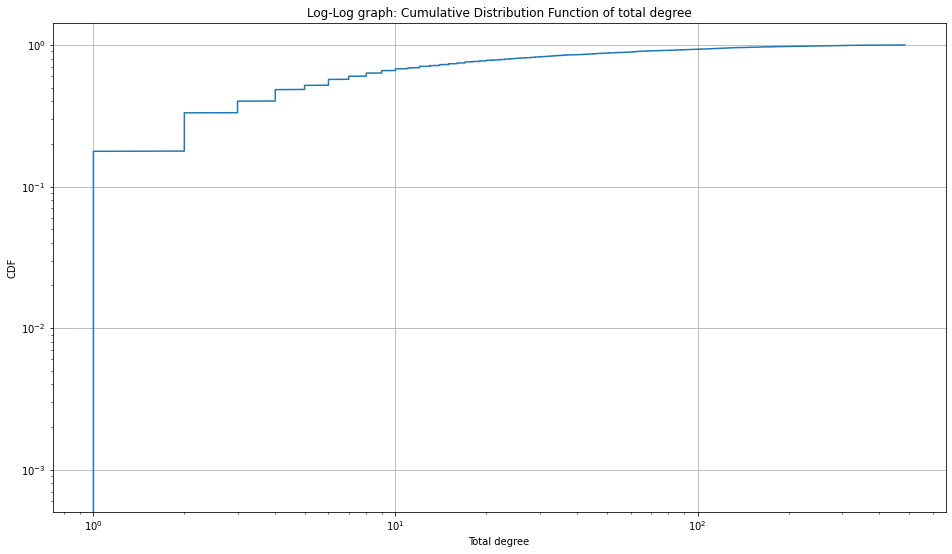

In [42]:
plt.figure(figsize=(16,9))
plt.plot(x, y) 
plt.grid(True)
plt.xlabel('Total degree')
plt.ylabel('CDF')
plt.title("Log-Log graph: Cumulative Distribution Function of total degree")
plt.yscale('log')
plt.xscale('log')
plt.savefig("CDF_log_log.png")
plt.show()

In [43]:
def conlist(ap):
    templist = []
    for i in range(len(list1)):
        if ((index1[ap],i) in edges) or ((i,index1[ap]) in edges):
            templist.append(list1[i])
    return templist

# this prints all nodes directly connected to a node, but it's pretty slow

print(conlist("FACT"))

['EDDF', 'EGLL', 'EHAM', 'LFPG', 'LTBA']


In [44]:
def edges_to_adjacencylist(edges): # this piece of code converts the edgelist to an adjacency list
    dictx = {}
    for (x,y) in edges:
        if list1[x] not in dictx:
            dictx[list1[x]] = [list1[y]]
        elif list1[y] not in dictx[list1[x]]:
            dictx[list1[x]].append(list1[y])
            
        if list1[y] not in dictx:
            dictx[list1[y]] = [list1[x]]
        elif list1[x] not in dictx[list1[y]]:
            dictx[list1[y]].append(list1[x])
            
    return dictx
        

In [45]:
adjlist = edges_to_adjacencylist(edges)

In [46]:
print (adjlist["FACT"])

['EGLL', 'EDDF', 'LFPG', 'LTBA', 'EHAM']


In [47]:
def bfs(graph, node): #function for BFS, graph is a dictionary of the adjacency list
    visited = [] # List for already visited nodes.
    queue = []         # Initialize a queue, this contains the nodes whose neighbours are yet to be visited
    connections = [] # This list, at the end, will contain all the nodes connected to the selected node
    
    visited.append(node)
    queue.append(node)

    while len(queue)>0:                    # Creating loop to visit each node
        m = queue.pop(0) 
        connections.append(m)

        for neighbour in graph[m]:
            if neighbour not in visited:
                visited.append(neighbour)
                queue.append(neighbour)
    
    return connections

In [48]:
connected1 = []
alreadyconnected = set()
connectedtemp = set()

for i in database1: #TROVARE LE COMPONENTI CONNESSE
    
    if i in alreadyconnected:
        continue
    
    connectedtemp = set()
    connectedtemp.add(i)

    for j in bfs(adjlist,i):
        connectedtemp.add(j)
        alreadyconnected.add(j)
        
    connected1.append(connectedtemp)
# fare un fit della coda della distribuzione e vedere se si adatta meglio ad un esponenziale, ad una gaussiana o ad un POW (powerlow)

In [49]:
print (connected1)

[{'LGSK', 'KPSM', 'LSZC', 'EGNT', 'URWW', 'ENST', 'ESNX', 'UTNU', 'UGSB', 'EGBB', 'EDLP', 'LPPR', 'ZYHB', 'EGNJ', 'LFQB', 'ENLA', 'HEAL', 'LTCE', 'EDMB', 'LKPM', 'KGSP', 'SBPA', 'EGJJ', 'LEBZ', 'LOWZ', 'KAUS', 'FMCZ', 'GCLP', 'OSDI', 'EPZG', 'EHBL', 'EDMA', 'UMMS', 'LFBF', 'EKAR', 'UTDD', 'SBGR', 'ENXO', 'LPLA', 'LGMK', 'ESNZ', 'EBBE', 'LFMT', 'URRR', 'EHGG', 'EDLS', 'LFDB', 'ENHV', 'EHLF', 'EDWE', 'EGMC', 'LGMG', 'EFPO', 'ZSAM', 'ENOC', 'LICZ', 'LFRH', 'LTAF', 'GCTS', 'ENNO', 'LKMT', 'ENXR', 'HESH', 'EGNV', 'LFMU', 'EDDH', 'LEBL', 'HECA', 'LFOP', 'UKWW', 'ENBO', 'LFRC', 'LFLP', 'ENSF', 'LOWK', 'EIDW', 'EBLG', 'UMII', 'LRTM', 'EHAM', 'LFAV', 'OPRN', 'LFRQ', 'LPMA', 'LFQG', 'EHKJ', 'ETOU', 'ENMH', 'EDPA', 'LFBL', 'ESGJ', 'LEMH', 'LIMJ', 'LOWW', 'LBPD', 'TNCM', 'LLSD', 'LFMN', 'EHLX', 'UTAA', 'EDDF', 'UUMB', 'SBCF', 'LFKB', 'EFTP', 'LGSR', 'EICK', 'LFRN', 'ENFL', 'LFCA', 'LGAL', 'LFRM', 'SABE', 'ENFG', 'LUKK', 'LSMP', 'LESA', 'EDFZ', 'OTBD', 'ENRO', 'LGML', 'KMCO', 'EGPM', 'EPKS', 'OAKB'

In [50]:
print(len(connected1))

14


In [61]:
degreedict0 = {}

for key in adjlist:
    val = adjlist[key]
    degreedict0[key] = len(val)

### In the next cell we do a bit of statistic

In [73]:
import numpy as np

degreelist1 = []
for key in degreedict0:
    val = degreedict0[key]
    degreelist1.append(val)
    
degreearray = np.array(degreelist1)
aver = np.mean(degreearray)
std = np.std(degreearray)
print("The average value of degree is: {}".format(aver))
print("The standard deviation of average degree is: {}".format(std))

The average value of degree is: 14.053314121037465
The standard deviation of average degree is: 29.63152741541503


In [52]:
degreedict2 = {}
default = -1
for key in adjlist:
    val = adjlist[key]
    degree = str(len(val))
    if degreedict2.get(degree,default) == -1: #if the key entry is not there, we set it
        degreedict2[degree] = [key]
    else:
        degreedict2[degree].append(key) #if the key entry is present, we append another airport

In [53]:
assortativity = {}


for key in degreedict2:
    val = degreedict2[key]
    Nk = len(val)
    sum1 = 0
    for airport in val:
        knn = 0
        for neigh in adjlist[airport]:         
            knn += degreedict0[neigh]
        knn /= degreedict0[airport]
        sum1 += knn
    assortativity[key] = sum1/Nk


In [54]:
print(assortativity["2"])

78.46618357487922


In [55]:
plt.style.use(['science', "notebook",'grid'])
plt.style.use('default')

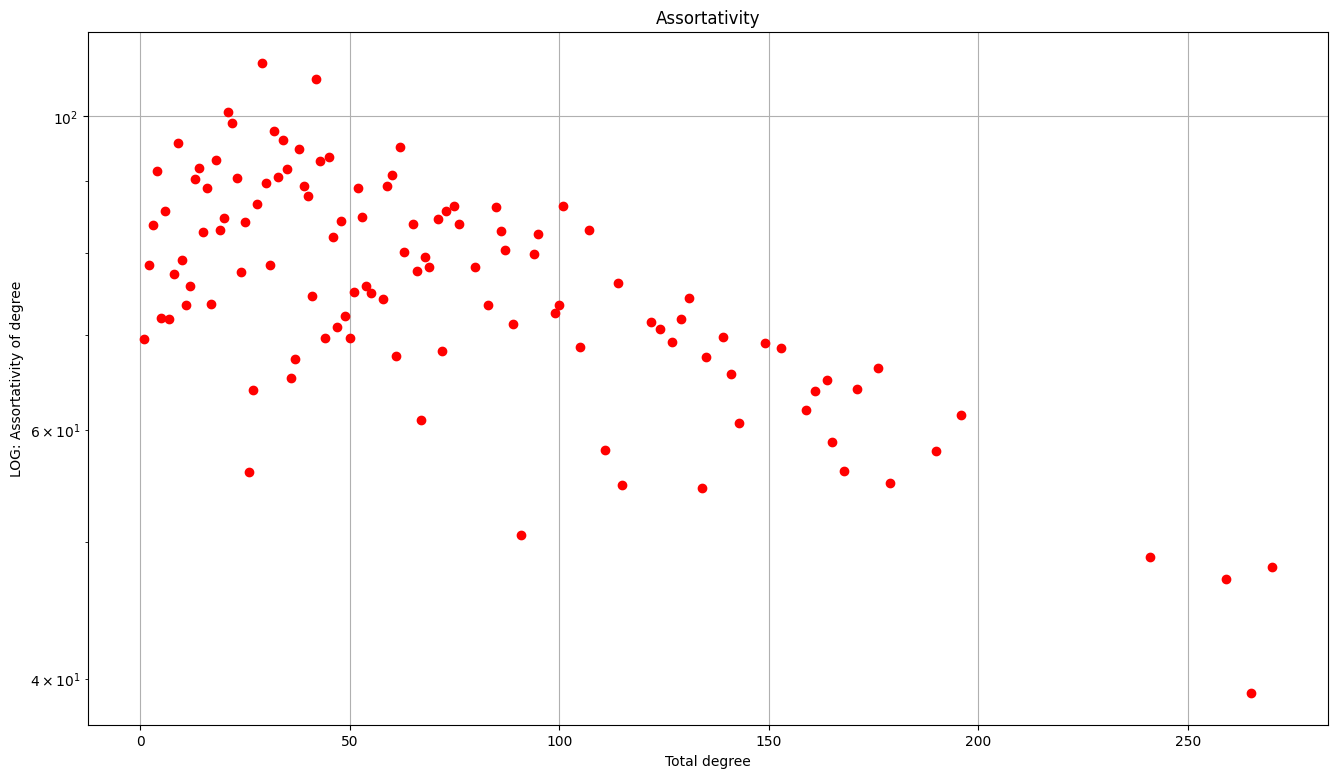

In [56]:
x = []
for key in assortativity:
    x.append(int(key))
x.sort()

y = []
for i in x:
    y.append(assortativity[str(i)])

plt.figure(figsize=(16,9))
plt.plot(x, y, "ro") 
plt.grid(True)
plt.xlabel('Total degree')
plt.ylabel('LOG: Assortativity of degree')
plt.title("Assortativity")
plt.yscale('log')
plt.xscale('linear')
plt.savefig("assortativity.png")
plt.show()